In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.metrics import f1_score,  recall_score, precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
# import visualkeras

np.random.seed(1)
tf.random.set_seed(1) 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [14]:
RANDOM_STATE = 42

In [15]:
test = pd.read_csv('Datasets/test_encoded.csv').copy()
train = pd.read_csv('Datasets/train_encoded.csv').copy()
original = pd.read_csv('Datasets/hotels_procesado.csv')

In [16]:
stand_scaler = StandardScaler()
train = stand_scaler.fit_transform(train)
test = stand_scaler.transform(test)

In [17]:
x = train.copy()
y = original['is_canceled'].copy()

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=RANDOM_STATE) #semilla

In [18]:
cant_clases = len(np.unique(y_train))
cant_inputs = len(train[0])

modelo = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[cant_inputs]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

es = EarlyStopping(monitor='val_loss', patience=5) 

In [19]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                11008     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,121
Trainable params: 13,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 256

In [20]:
modelo.compile(
    # optimizer=keras.optimizers.SGD(learning_rate=0.001),
    optimizer='adam',
    loss='bce',
    metrics=['accuracy']
    )

history = modelo.fit(x_train, y_train, epochs=epochs, batch_size=64, verbose=1, validation_data = (x_test, y_test), callbacks=[es])

Epoch 1/256
582/582 [==============================] - 3s 4ms/step - loss: 0.4179 - accuracy: 0.7918 - val_loss: 0.3614 - val_accuracy: 0.8235
Epoch 2/256
582/582 [==============================] - 2s 3ms/step - loss: 0.3321 - accuracy: 0.8388 - val_loss: 0.3463 - val_accuracy: 0.8341
Epoch 3/256
582/582 [==============================] - 2s 4ms/step - loss: 0.3078 - accuracy: 0.8536 - val_loss: 0.3322 - val_accuracy: 0.8421
Epoch 4/256
582/582 [==============================] - 2s 4ms/step - loss: 0.2903 - accuracy: 0.8634 - val_loss: 0.3335 - val_accuracy: 0.8409
Epoch 5/256
582/582 [==============================] - 2s 4ms/step - loss: 0.2778 - accuracy: 0.8708 - val_loss: 0.3299 - val_accuracy: 0.8434
Epoch 6/256
582/582 [==============================] - 2s 4ms/step - loss: 0.2665 - accuracy: 0.8775 - val_loss: 0.3326 - val_accuracy: 0.8417
Epoch 7/256
582/582 [==============================] - 3s 5ms/step - loss: 0.2562 - accuracy: 0.8824 - val_loss: 0.3348 - val_accuracy: 0.8414

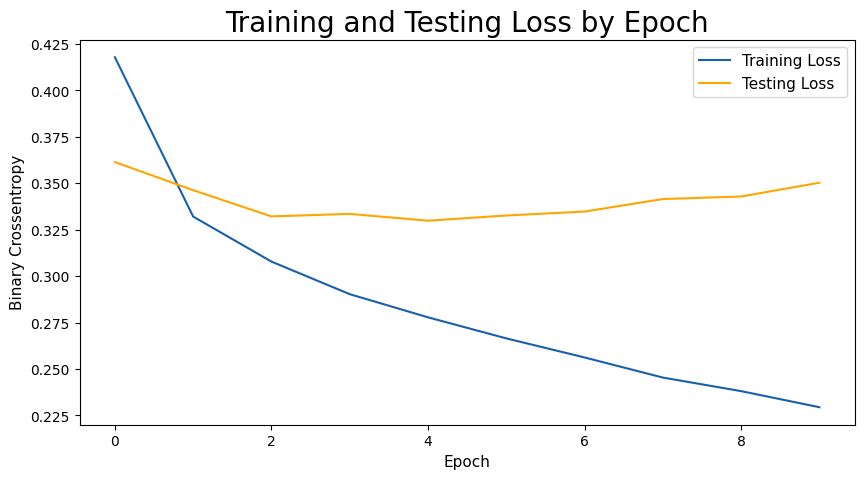

In [21]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Visualizing our training and testing loss by epoch
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')
plt.title('Training and Testing Loss by Epoch', fontsize = 20)
plt.xlabel('Epoch', fontsize = 11)
plt.ylabel('Binary Crossentropy', fontsize = 11)
plt.legend(fontsize = 11)

# Credit to GA CNN global lecture author for the graph code 

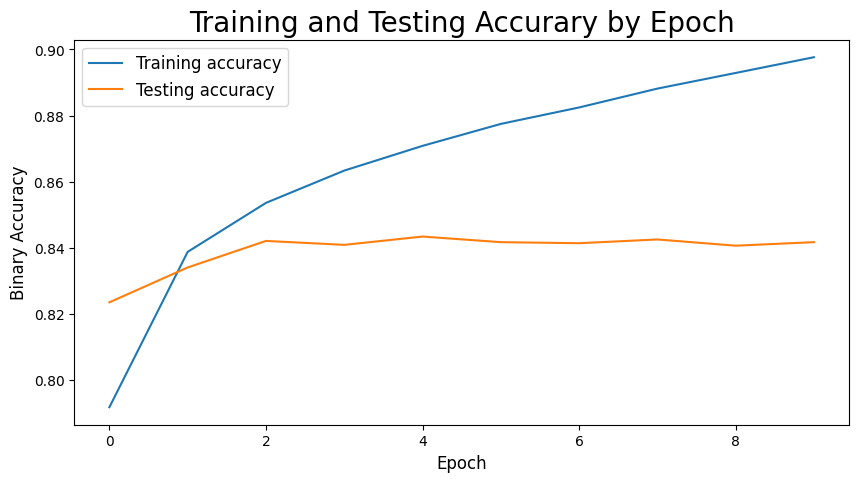

In [22]:
# Visualizing our training and testing accuracy by epoch:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Testing accuracy')
plt.title('Training and Testing Accurary by Epoch', fontsize = 20)
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Binary Accuracy', fontsize = 12)
plt.legend(fontsize = 12)

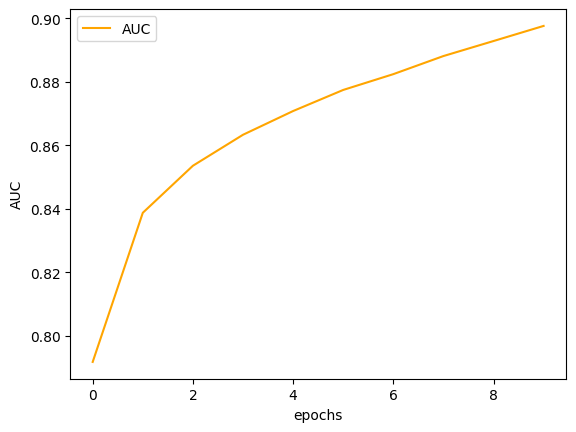

In [27]:

plt.plot(history.history['accuracy'], color='orange', label='AUC')
plt.xlabel("epochs")
plt.ylabel("AUC")
plt.legend()

In [28]:
# Scoring
train_score = modelo.evaluate(x_train,
                       y_train,
                       verbose=1)
test_score = modelo.evaluate(x_test,
                       y_test,
                       verbose=1)
labels = modelo.metrics_names

print('')
print(f'Training Accuracy: {train_score[1]}')
print(f'Testing Accuracy: {test_score[1]}')

499/499 [==============================] - 1s 2ms/step - loss: 0.3503 - accuracy: 0.8417

Training Accuracy: 0.9117283225059509
Testing Accuracy: 0.8417189717292786


In [29]:
y_pred = modelo.predict(x_test)

499/499 [==============================] - 1s 2ms/step


In [30]:
y_pred_binario = np.where(y_pred > 0.3851, 1, 0)

accuracy = accuracy_score(y_test, y_pred_binario)
recall = recall_score(y_test, y_pred_binario)
f1 = f1_score(y_test, y_pred_binario,)
precision = precision_score(y_test, y_pred_binario)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.8354454203262234
Recall: 0.9024420325604341
Precision: 0.7997595365613728
f1 score: 0.8480037086399722


In [31]:
#Reporte de Clasificación
print(classification_report(y_test,y_pred_binario))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      7832
           1       0.80      0.90      0.85      8108

    accuracy                           0.84     15940
   macro avg       0.84      0.83      0.83     15940
weighted avg       0.84      0.84      0.83     15940



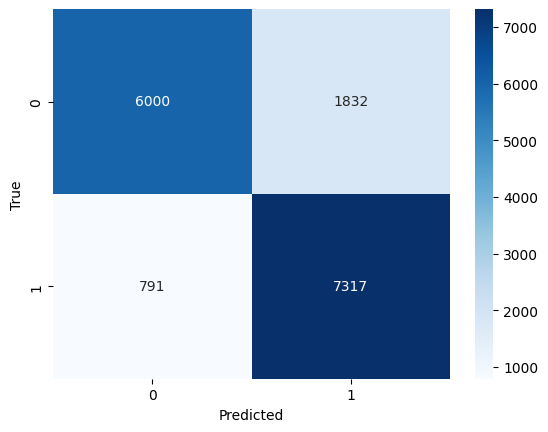

In [32]:
#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred_binario)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()